![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)

**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 4: implementación de la convolución
```

## **Practica 4: Implementación de la convolución discreta**

###**4.1. Importación de Librerías**

* **Librerias a utilizar:**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import time
from IPython import display
plt.style.use(['dark_background'])

###**4.2. Cálculo de la convolución usando una funcion de alto nivel**

![https://graphics.stanford.edu/courses/cs178/applets/convolution-equation2-c.jpg](https://graphics.stanford.edu/courses/cs178/applets/convolution-equation2-c.jpg)


![https://qph.fs.quoracdn.net/main-qimg-cb81d3dfbe146b84ebf717ec12722f32.webp](https://qph.fs.quoracdn.net/main-qimg-cb81d3dfbe146b84ebf717ec12722f32.webp)

* **Creación de la señal y el kernel**

In [17]:
#Creando una señal arbitraria
senal1 = np.concatenate( (np.zeros(10),np.ones(10),np.zeros(10),2*np.ones(10),np.zeros(10),3*np.ones(10),np.zeros(10),4*np.ones(10),np.zeros(40)), axis=0)

#Creando el kernel
kernel = np.exp( -np.linspace(-2,2,20)**2)  #Función gaussiana
kernel = kernel/sum(kernel)
N = len(senal1) #longitud de señal


* **Mostrando señales creadas**

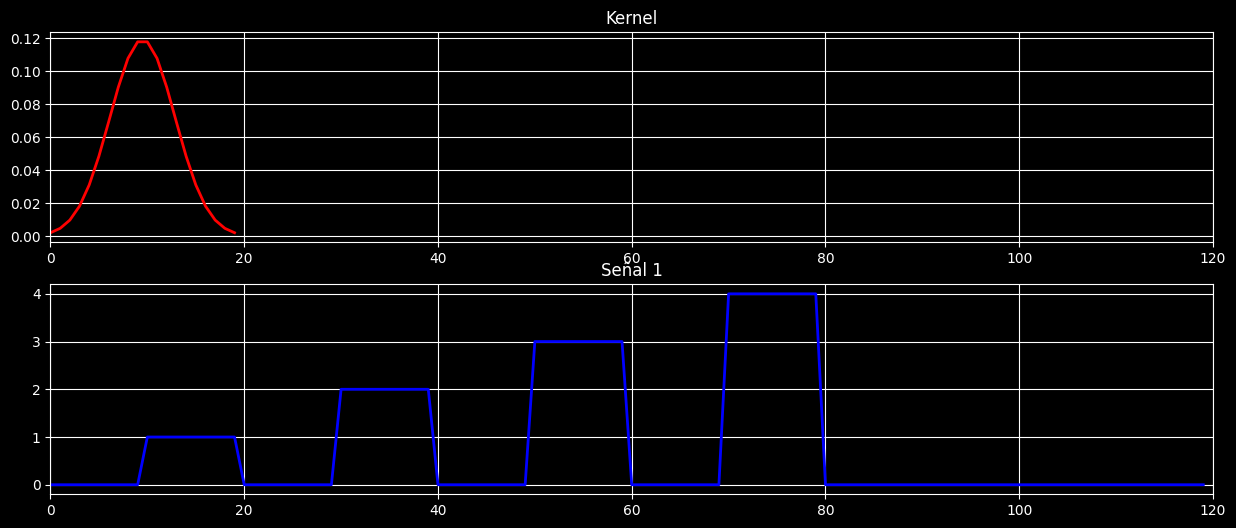

In [18]:
plt.figure(figsize=(15,6)) #Tamaño de gráfica

#Gráfica del kernel
plt.subplot(211)
plt.plot(kernel, 'r', linewidth=2)
plt.xlim([0,N]) #Limitamos el eje x entre 0 y N
plt.title('Kernel')
plt.grid()

#Gráfica de la señal
plt.subplot(212)
plt.plot(senal1, 'b', linewidth=2)
plt.xlim([0,N]) #Limitamos el eje x entre 0 y N
plt.title('Señal 1')
plt.grid()
plt.show()

 * **Cálculo y gráfica de la convolución**

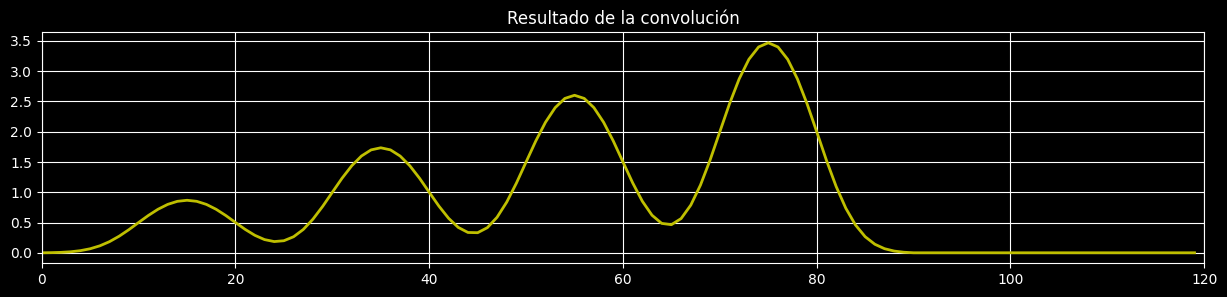

In [19]:
resultado = np.convolve(senal1, kernel, 'same')

plt.figure(figsize=(15,3)) #Tamaño de gráfica

plt.plot(resultado, 'y', linewidth=2)
plt.xlim([0,N]) #Limitamos el eje x entre 0 y N
plt.title('Resultado de la convolución')
plt.grid()
plt.show()

###**4.2. Detalles de la convolución**
>*Longitud de la convolución de 2 señales.*

>*Efecto del kernel*

* **Creación de señales y aplicación de la convolución**





In [13]:
#Crear un pulso
#senal2 = np.zeros(20)
senal2=np.concatenate( (np.zeros(30),np.ones(2),np.zeros(20),2*np.ones(10),np.zeros(30),-np.ones(10),np.zeros(40)), axis=0)
#senal2[8:15] = 1

#Kernel arbitrario
kernel = np.array([1,.8,.6,.4,.2])

#Tamaño de la convolución
nSenal2 = len(senal2)
nKernel = len(kernel)
nConvolucion = nSenal2 + nKernel - 1

#Aplicación
resultado = np.convolve(senal2, kernel, 'full')

* **Graficando resultados**

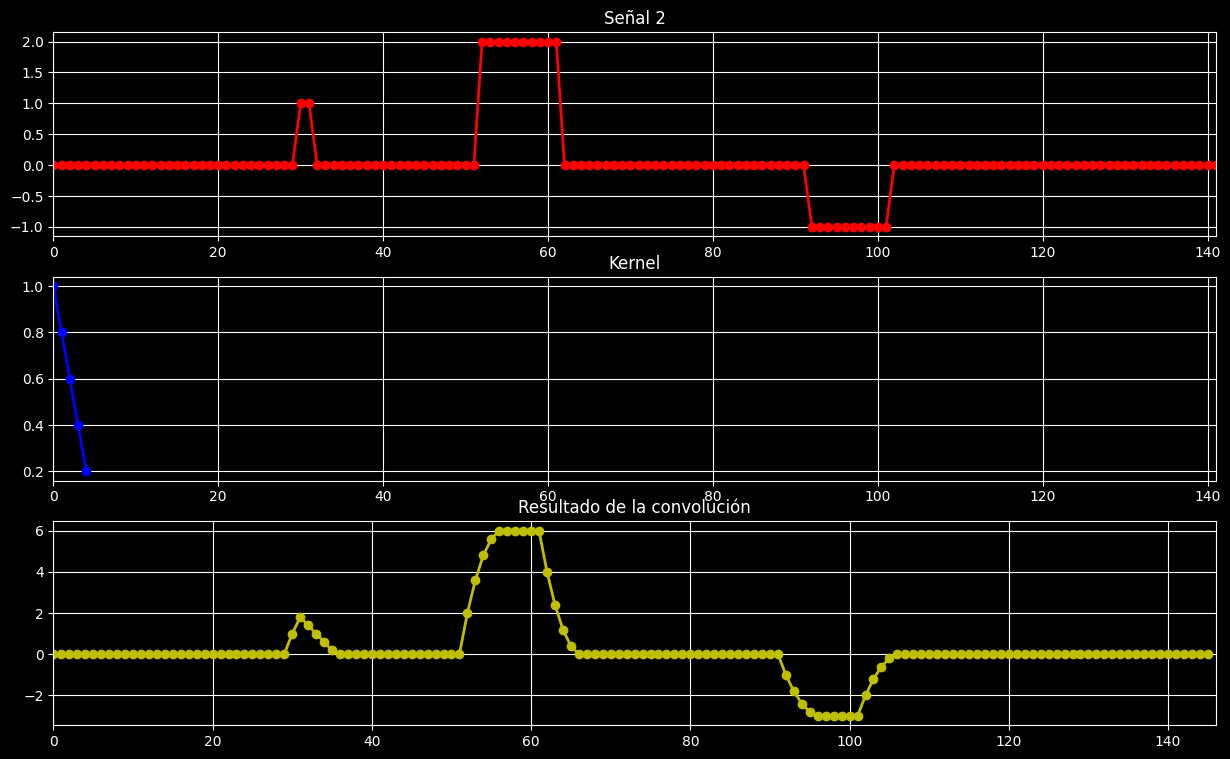

In [14]:
plt.figure(figsize=(15,9)) #Tamaño de gráfica

#Grafica de la señal2
plt.subplot(311)
plt.plot(senal2, 'ro-', linewidth=2)
plt.xlim([0,nSenal2-1])
plt.title('Señal 2')
plt.grid()

#Grafica del kernel
plt.subplot(312)
plt.plot(kernel, 'bo-', linewidth=2)
plt.xlim([0,nSenal2-1])
plt.title('Kernel')
plt.grid()

#Grafica del resultado
plt.subplot(313)
plt.plot(resultado, 'yo-', linewidth=2)
plt.xlim([0,nConvolucion])
plt.title('Resultado de la convolución')
plt.grid()
plt.show()

###**4.3. Animación de la convolución**

*Se usarán las señales creadas en el apartado anterior*

In [ ]:
import warnings
warnings.filterwarnings('ignore')

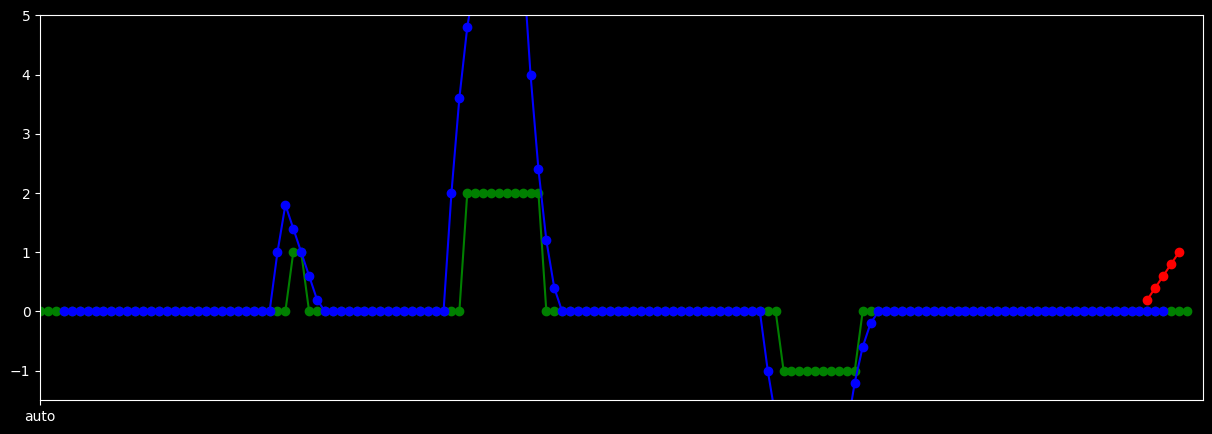

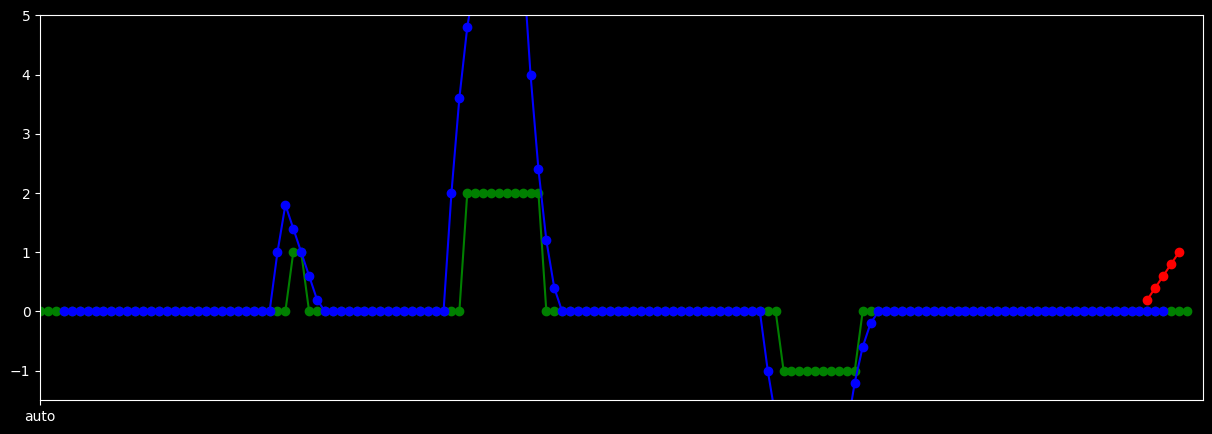

In [16]:
#Calculamos la mitad del kernel
mitad_kernel = int(np.floor(nKernel/2)) #redondeo hacia abajo

#Invertimos el kernel
kernel_invertido = kernel[::-1]

#Rellenando la señal con 0's para almacenar la salida
senal1_pad = np.concatenate((np.zeros(mitad_kernel), senal2, np.zeros(mitad_kernel)), axis=0)

#Vector para almacenar el resultado
conv_resultado = np.zeros(nConvolucion)

#Correr la convolución
plt.figure(figsize=(15,5))

for ti in range(mitad_kernel, nConvolucion-mitad_kernel):

  #Extrayendo una ventana del tamaño del kernel
  ventana = senal1_pad[ti-mitad_kernel: ti+mitad_kernel+1]

  #Producto punto de la ventana por el kernel invertido
  conv_resultado[ti] = np.sum(ventana * kernel_invertido)

  #Graficando
  plt.cla()
  plt.axis(['auto','auto',-1.5,5])
  plt.plot(senal1_pad, 'go-')
  plt.plot(np.arange(ti-mitad_kernel-1, ti+mitad_kernel), kernel_invertido, 'ro-') #Mov kernel
  plt.plot(np.arange(mitad_kernel+1, ti), conv_resultado[mitad_kernel+1:ti], 'bo-')
  plt.xlim([0, nConvolucion+1]) #Rango de x

  display.clear_output(wait=True)
  display.display(plt.gcf())

  time.sleep(0.1)

conv_resultado = conv_resultado[mitad_kernel:-mitad_kernel]




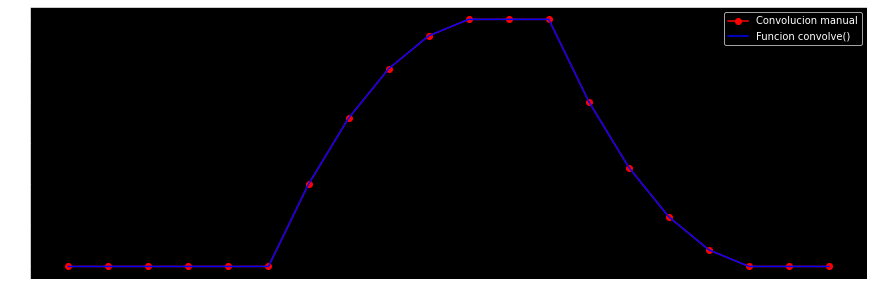